# **I. Import necessary packages**

In [ ]:
import json
import pandas as pd
import numpy as np
import regex as re
from textblob import TextBlob

In [ ]:
!pip install deep_translator
from deep_translator import GoogleTranslator

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 128 kB 7.6 MB/s 
  Attempting uninstall: beautifulsoup4
    Found existing installation: beautifulsoup4 4.6.3
    Uninstalling beautifulsoup4-4.6.3:
      Successfully uninstalled beautifulsoup4-4.6.3


# **II. Load Spider Dataset and create a Dataframe**

In [ ]:
f = open('/content/drive/MyDrive/NLP_project_/Data/spider.json')
data = json.load(f)
data[16]

{'query-split': 'N/A',
 'sentences': [{'database': 'farm',
   'original': 'How many farms are there?',
   'question-split': 'train',
   'text': 'How many farms are there ?',
   'variables': {}},
  {'database': 'farm',
   'original': 'Count the number of farms.',
   'question-split': 'train',
   'text': 'Count the number of farms .',
   'variables': {}}],
 'sql': ['SELECT COUNT( * ) FROM FARM AS FARMalias0 ;'],
 'sql-original': ['SELECT count(*) FROM farm'],
 'variables': []}

In [ ]:
sentences = []
sql_original = []
for line in data:
  i = 0
  for sent in line["sentences"]:
    i += 1
    sentences.append(sent["original"])
  for j in range(i):
    sql_original.append(line["sql-original"])

In [ ]:
df = pd.DataFrame(list(zip(sentences, sql_original)), columns=['sentence', 'sql_original'])

# **III. Translate EN sentence to FR sentence and save**

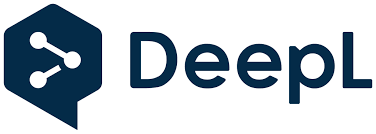

In [ ]:
def translate(text):
    if not TextBlob(text) == "fr":
        return GoogleTranslator(source='auto', target='fr').translate(text)
    else:
        return text

In [ ]:
sentences_fr = []
for sent in df["sentence"]:
  sentences_fr.append(translate(sent))
df["fr_sentence"] = sentences_fr
df.head()

,sentence,sql_original,fr_sentence
0,How many heads of the departments are older th...,[SELECT count(*) FROM head WHERE age > 56],Combien de chefs de service ont plus de 56 ans ?
1,"List the name, born state and age of the heads...","[SELECT name , born_state , age FROM head ORDE...","Indiquez le nom, l'état de naissance et l'âge ..."
2,"List the creation year, name and budget of eac...","[SELECT creation , name , budget_in_billions F...","Indiquez l'année de création, le nom et le bud..."
3,What are the maximum and minimum budget of the...,"[SELECT max(budget_in_billions) , min(budget_i...",Quels sont le budget maximum et minimum des dé...
4,What is the average number of employees of the...,[SELECT avg(num_employees) FROM department WHE...,Quel est le nombre moyen d'employés des départ...


In [ ]:
df = df.drop(["sentence"], axis=1)
df.head()

,sql_original,fr_sentence
0,[SELECT count(*) FROM head WHERE age > 56],Combien de chefs de service ont plus de 56 ans ?
1,"[SELECT name , born_state , age FROM head ORDE...","Indiquez le nom, l'état de naissance et l'âge ..."
2,"[SELECT creation , name , budget_in_billions F...","Indiquez l'année de création, le nom et le bud..."
3,"[SELECT max(budget_in_billions) , min(budget_i...",Quels sont le budget maximum et minimum des dé...
4,[SELECT avg(num_employees) FROM department WHE...,Quel est le nombre moyen d'employés des départ...


In [ ]:
df

,sql_original,fr_sentence
0,[SELECT count(*) FROM head WHERE age > 56],Combien de chefs de service ont plus de 56 ans ?
1,"[SELECT name , born_state , age FROM head ORDE...","Indiquez le nom, l'état de naissance et l'âge ..."
2,"[SELECT creation , name , budget_in_billions F...","Indiquez l'année de création, le nom et le bud..."
3,"[SELECT max(budget_in_billions) , min(budget_i...",Quels sont le budget maximum et minimum des dé...
4,[SELECT avg(num_employees) FROM department WHE...,Quel est le nombre moyen d'employés des départ...
...,...,...
9688,[SELECT Citizenship FROM singer WHERE Birth_Ye...,Quelles sont les nationalités partagées par le...
9689,[SELECT count(*) FROM Other_Available_Features],Combien y a-t-il de fonctionnalités disponible...
9690,[SELECT T2.feature_type_name FROM Other_Availa...,Quel est le nom du type de fonctionnalité de l...
9691,[SELECT T2.property_type_description FROM Prop...,Afficher les descriptions de type de propriété...


In [ ]:
df.to_csv("/content/drive/MyDrive/NLP_project_/Spider_FR2SQL_data.csv", index=False, encoding='utf-8')

# **IV. Data preprocessing and filtering**

In [ ]:
data = pd.read_csv(r'/content/drive/MyDrive/NLP_project_/Data/Spider_FR2SQL_data.csv', dtype=str)
data

,sql,sentences_fr
0,SELECT count(*) FROM head WHERE age > 56,Combien de chefs de service ont plus de 56 ans ?
1,"SELECT name , born_state , age FROM head ORDER...","Indiquez le nom, l'état de naissance et l'âge ..."
2,"SELECT creation , name , budget_in_billions FR...","Indiquez l'année de création, le nom et le bud..."
3,"SELECT max(budget_in_billions) , min(budget_in...",Quels sont le budget maximum et minimum des dé...
4,SELECT avg(num_employees) FROM department WHER...,Quel est le nombre moyen d'employés des départ...
...,...,...
9688,SELECT Citizenship FROM singer WHERE Birth_Yea...,Quelles sont les nationalités partagées par le...
9689,SELECT count(*) FROM Other_Available_Features,Combien y a-t-il de fonctionnalités disponible...
9690,SELECT T2.feature_type_name FROM Other_Availab...,Quel est le nom du type de fonctionnalité de l...
9691,SELECT T2.property_type_description FROM Prope...,Afficher les descriptions de type de propriété...


In [ ]:
# Keep only SELECT statements, FROM and WHERE clauses
idxs_complex_query = []
keep_set = set(['SELECT', 'FROM', 'WHERE'])
for i in range(0, len(data)):
  up_words = re.findall(r'\b[A-Z]+(?:\s+[A-Z]+)*\b', data['sql'][i])
  count_statement = data['sql'][i].count('SELECT')
  count_statement += data['sql'][i].count('FROM')
  count_statement += data['sql'][i].count('WHERE')
  if len(keep_set.union(set(up_words))) > 3 or count_statement > 4:
      idxs_complex_query.append(i)

In [ ]:
len(idxs_complex_query)

8309

In [ ]:
data.drop(idxs_complex_query, inplace=True)
data.reset_index(inplace=True)
len(data)

In [ ]:
data.head(40)['sql']

0              SELECT count(*) FROM head WHERE age > 56
1     SELECT creation , name , budget_in_billions FR...
2     SELECT max(budget_in_billions) , min(budget_in...
3     SELECT name FROM head WHERE born_state != 'Cal...
4                             SELECT count(*) FROM farm
5                             SELECT count(*) FROM farm
6     SELECT Hosts FROM farm_competition WHERE Theme...
7     SELECT Hosts FROM farm_competition WHERE Theme...
8     SELECT avg(Working_Horses) FROM farm WHERE Tot...
9     SELECT avg(Working_Horses) FROM farm WHERE Tot...
10               SELECT max(Cows) , min(Cows) FROM farm
11               SELECT max(Cows) , min(Cows) FROM farm
12    SELECT Census_Ranking FROM city WHERE Status !...
13    SELECT Census_Ranking FROM city WHERE Status !...
14     SELECT student_id FROM student_course_attendance
15     SELECT student_id FROM student_course_attendance
16    SELECT candidate_id FROM candidate_assessments...
17    SELECT candidate_id FROM candidate_assessm

In [ ]:
# Checking 
for i in range(0, len(data)):
  print(re.findall(r'\b[A-Z]+(?:\s+[A-Z]+)*\b', data['sql'][i]))

['SELECT', 'FROM', 'WHERE']
['SELECT', 'FROM']
['SELECT', 'FROM']
['SELECT', 'FROM', 'WHERE']
['SELECT', 'FROM']
['SELECT', 'FROM']
['SELECT', 'FROM', 'WHERE']
['SELECT', 'FROM', 'WHERE']
['SELECT', 'FROM', 'WHERE']
['SELECT', 'FROM', 'WHERE']
['SELECT', 'FROM']
['SELECT', 'FROM']
['SELECT', 'FROM', 'WHERE']
['SELECT', 'FROM', 'WHERE']
['SELECT', 'FROM']
['SELECT', 'FROM']
['SELECT', 'FROM', 'WHERE']
['SELECT', 'FROM', 'WHERE']
['SELECT', 'FROM', 'WHERE']
['SELECT', 'FROM', 'WHERE']
['SELECT', 'FROM', 'WHERE']
['SELECT', 'FROM', 'WHERE']
['SELECT', 'FROM', 'WHERE']
['SELECT', 'FROM', 'WHERE']
['SELECT', 'FROM', 'WHERE']
['SELECT', 'FROM', 'WHERE']
['SELECT', 'FROM', 'WHERE']
['SELECT', 'FROM', 'WHERE']
['SELECT', 'FROM', 'WHERE']
['SELECT', 'FROM', 'WHERE']
['SELECT', 'FROM']
['SELECT', 'FROM', 'WHERE']
['SELECT', 'FROM']
['SELECT', 'FROM']
['SELECT', 'FROM']
['SELECT', 'FROM']
['SELECT', 'FROM']
['SELECT', 'FROM', 'WHERE']
['SELECT', 'FROM', 'WHERE']
['SELECT', 'FROM', 'WHERE']
['SELE

# **V. Data preparation for annotation**

In [ ]:
# keep the order of the columns like "fr_sentence" then "sql" to help us annotate well
temp_data = data['sql'].copy()
data['sql'] = data['fr_sentence']
data['fr_sentence'] = temp_data
data.rename(columns = {'sql':'fr_sentence', 'fr_sentence':'sql'}, inplace=True)

In [ ]:
data.drop('index', axis=1, inplace=True)
data.columns

Index(['sentences_fr', 'sql'], dtype='object')

In [ ]:
# divide the annotation work into two parts
data1 = data[0:692]
data2 = data[692:]

In [ ]:
data1.to_csv(r'/content/drive/MyDrive/NLP_project_/Data/sample_Spider_FR2SQL_data1.txt', header=None, index=None, mode='a', sep='\n')
data2.to_csv(r'/content/drive/MyDrive/NLP_project_/Data/sample_Spider_FR2SQL_data2.txt', header=None, index=None, mode='a', sep='\n')